In [1]:
import pandas as pd
import numpy as np

# 数据集

**Readme.txt** 

**test_info.txt**: 所有的试题（小学数学），试题有标注知识点ID（knowledge_ids），一个试题可能有多个知识点   
test_info_description.docx: 试题格式说明

**test_knowledge_trees.txt**: 分层的知识树，标识层次化的知识学习体系   
test_knowledge_trees_description.txt：知识树字段解释文档

## test_knowledge_trees_description.txt

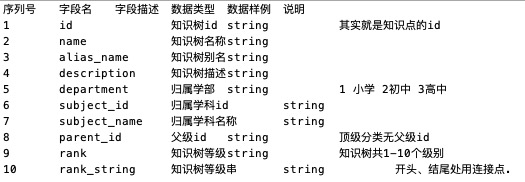

id   
subject_id   
parent_id   
rank   
rank_string   

## 1、test_info.txt: 所有的试题（小学数学）
试题有标注知识点ID（knowledge_ids），一个试题可能有多个知识点

In [2]:
test_info_path = "../test_library_info/test_info.txt"
test_info_description_path = "../test_library_info/test_info_description.csv"
test_info_description_df = pd.read_csv(test_info_description_path)
#查寻说明
test_info_description_df[test_info_description_df["列名"]=="ability_level_id"]
info_df = pd.read_table(test_info_path)
del info_df["Unnamed: 0"]
info_df.shape#(231891, 63)
info_df.head()

/Users/mayanli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,33,39,41,45,51,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ability_level_id,accuracy,accuracy_sort,adding_mode,answer_times,batch_num,category_id,category_tree_id,choice_type,choose_sort,...,test_type,url,use_env,used_exam_names,used_handout_names,used_sort,used_times,verify_time,verify_timestamp,year_sort
0,0,0,0,2,0,2.018071e+13,136,NaN,0,1,...,3,"1093993,1093994,1094801,1094804,1141904",1,NaN,NaN,10,0,2018-08-03 17:23:39,1533288219,9
1,0,0,0,2,0,2.018071e+13,136,NaN,0,1,...,3,NaN,1,NaN,NaN,10,0,2018-08-03 17:23:39,1533288219,9
2,0,0,0,2,0,2.018071e+13,136,NaN,0,1,...,3,NaN,1,NaN,NaN,10,0,2018-08-03 17:23:39,1533288219,9
3,0,0,0,2,0,2.018071e+13,138,NaN,0,1,...,1,NaN,1,NaN,NaN,10,0,2018-08-03 17:23:39,1533288219,9
4,0,0,0,2,0,2.018071e+13,138,NaN,0,1,...,1,NaN,1,NaN,NaN,10,0,2018-08-03 17:23:39,1533288219,9


In [3]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231891 entries, 0 to 231890
Data columns (total 63 columns):
ability_level_id      231891 non-null int64
accuracy              231891 non-null int64
accuracy_sort         231891 non-null int64
adding_mode           231891 non-null int64
answer_times          231891 non-null int64
batch_num             231279 non-null float64
category_id           231891 non-null int64
category_tree_id      0 non-null float64
choice_type           231891 non-null int64
choose_sort           231891 non-null int64
classify_ids          104 non-null float64
create_id             231891 non-null int64
create_name           231717 non-null object
create_time           231891 non-null object
create_timestamp      231891 non-null int64
custom_label          228504 non-null object
department_id         231891 non-null int64
difficulty            231891 non-null int64
download_times        231891 non-null int64
empty_knowledge       231891 non-null int64
empty_so

In [4]:
info_df.describe()

,ability_level_id,accuracy,accuracy_sort,adding_mode,answer_times,batch_num,category_id,category_tree_id,choice_type,choose_sort,...,test_num,test_status,test_type,use_env,used_exam_names,used_handout_names,used_sort,used_times,verify_timestamp,year_sort
count,231891.0,231891.0,231891.0,231891.000000,231891.0,2.312790e+05,231891.000000,0.0,231891.000000,231891.0,...,231891.000000,231891.000000,231891.000000,231891.0,0.0,0.0,231891.0,231891.0,2.318910e+05,231891.000000
mean,0.0,0.0,0.0,2.837497,0.0,2.018080e+13,28.297648,NaN,0.026310,1.0,...,392.232747,1.050308,2.733961,1.0,NaN,NaN,10.0,0.0,1.305590e+09,1.080577
std,0.0,0.0,0.0,0.375998,0.0,2.455333e+07,55.522419,NaN,0.161477,0.0,...,316.330961,0.218580,0.659792,0.0,NaN,NaN,0.0,0.0,5.464991e+08,2.746508
min,0.0,0.0,0.0,1.000000,0.0,2.018071e+13,0.000000,NaN,0.000000,1.0,...,0.000000,1.000000,1.000000,1.0,NaN,NaN,10.0,0.0,0.000000e+00,0.000000
25%,0.0,0.0,0.0,3.000000,0.0,2.018081e+13,0.000000,NaN,0.000000,1.0,...,86.000000,1.000000,3.000000,1.0,NaN,NaN,10.0,0.0,1.533872e+09,0.000000
50%,0.0,0.0,0.0,3.000000,0.0,2.018081e+13,0.000000,NaN,0.000000,1.0,...,357.000000,1.000000,3.000000,1.0,NaN,NaN,10.0,0.0,1.533911e+09,0.000000
75%,0.0,0.0,0.0,3.000000,0.0,2.018081e+13,0.000000,NaN,0.000000,1.0,...,662.000000,1.000000,3.000000,1.0,NaN,NaN,10.0,0.0,1.534083e+09,0.000000
max,0.0,0.0,0.0,3.000000,0.0,2.018082e+13,138.000000,NaN,2.000000,1.0,...,999.000000,2.000000,3.000000,1.0,NaN,NaN,10.0,0.0,1.575534e+09,10.000000


## 2、test_knowledge_trees.txt: 分层的知识树，标识层次化的知识学习体系

In [5]:
test_knowledge_tree_path = "../test_library_info/test_knowledge_trees.txt"
knowledge_tree_df = pd.read_table(test_knowledge_tree_path)
#增加字段名称
knowledge_trees_description_df = pd.read_table('../test_library_info/test_knowledge_trees_description.txt')
knowledge_trees_colmuns = knowledge_trees_description_df["字段名"].to_list()
knowledge_trees_colmuns = [i.strip() for i in knowledge_trees_colmuns]
knowledge_tree_df.columns=knowledge_trees_colmuns
# knowledge_tree_df.shape#(26312, 10)
knowledge_tree_df.head()

,id,name,alias_name,description,department,subject_id,subject_name,parent_id,rank,rank_string
0,89,方程与不等式,NaN,NaN,2,2,数学,74,3,.3.74.89.
1,82,综合,NaN,NaN,2,2,数学,3,2,.3.82.
2,81,统计概率与实践,NaN,NaN,2,2,数学,3,2,.3.81.
3,79,图形与几何,NaN,NaN,2,2,数学,3,2,.3.79.
4,76,有理数,NaN,NaN,2,2,数学,75,4,.3.74.75.76.


In [6]:
knowledge_tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26312 entries, 0 to 26311
Data columns (total 10 columns):
id              26312 non-null int64
name            26312 non-null object
alias_name      1984 non-null object
description     19 non-null object
department      26312 non-null int64
subject_id      26312 non-null int64
subject_name    26312 non-null object
parent_id       26312 non-null int64
rank            26312 non-null int64
rank_string     26312 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
knowledge_tree_df.describe()

,id,department,subject_id,parent_id,rank
count,26312.000000,26312.000000,26312.000000,26312.000000,26312.000000
mean,20314.981339,2.145067,6.108886,19219.555640,5.166502
std,10160.193791,0.973545,5.772962,10482.132992,1.100850
min,1.000000,1.000000,1.000000,0.000000,1.000000
25%,11319.750000,2.000000,2.000000,10062.000000,4.000000
50%,22039.500000,2.000000,4.000000,20987.000000,5.000000
75%,29010.250000,3.000000,8.000000,28255.250000,6.000000
max,36737.000000,100.000000,44.000000,36728.000000,10.000000


In [ ]:
knowledge_tree_df.to_csv("../test_library_info/test_knowledge_trees.csv",index=False)
info_df.to_csv("../test_library_info/test_info.csv",index=False)

In [8]:
knowledge_tree_df.head()

,id,name,alias_name,description,department,subject_id,subject_name,parent_id,rank,rank_string
0,89,方程与不等式,NaN,NaN,2,2,数学,74,3,.3.74.89.
1,82,综合,NaN,NaN,2,2,数学,3,2,.3.82.
2,81,统计概率与实践,NaN,NaN,2,2,数学,3,2,.3.81.
3,79,图形与几何,NaN,NaN,2,2,数学,3,2,.3.79.
4,76,有理数,NaN,NaN,2,2,数学,75,4,.3.74.75.76.


In [16]:
math_department1_knowledge_tree_df = knowledge_tree_df[(knowledge_tree_df["subject_id"]==2) & (knowledge_tree_df["department"]==1)]


In [17]:
math_department1_knowledge_tree_df.to_csv("../test_library_info/math_department1_test_knowledge_trees.csv",index=False)
